# AutoRegressive Integrated Moving Average (ARIMA)
ARIMA models provide another approach to time series forecasting. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting, and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be.

In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.

Partial autocorrelations functions (PACF) are used to measure the degree of association between observations at times $t$ and $t - k$, $Y_t$ and $Y_{t-k}$, when the effects of other time lags, $1, \ldots, k - 1$, are removed. The usefulness of partial autocorrelations may be understood in the following example. Suppose there is significant autocorrelation between $Y_t$ and $Y_{t-1}$. This implies that there is also significant correlation between $Y_t$ and $Y_{t-2}$, since they are one time step apart. There is therefore significant autocorrelation between $Y_t$ and $Y_{t-2}$, because they are both correlated with $Y_{t-1}$. However, it can only be known if there is an independent relationship between $Y_t$ and $Y_{t-2}$ if the effect of $Y_{t-1}$ can be partially out. Partial autocorrelations calculate true correlations between $Y_t$ and $Y_{t-1}$, $\ldots$, $Y_k$ using a regression equation known as an autoregression (AR):

$$
Y_t = b_0 + b_1Y_{t-1} + b_2Y_{t-2} + \ldots + b_kY_{t-k}
$$


## Import pandas
Pandas is a data manipulation library in Python. It provides data structures and functions needed to manipulate structured data. It's built on top of two core Python libraries - Matplotlib for data visualization and NumPy for mathematical operations. 

One of the key features of Pandas is its ability to read and write data from a variety of formats including, but not limited to, CSV, text files, SQL databases, and Excel spreadsheets. The `read_excel` function is specifically used to read Excel files. It returns a DataFrame.

In [ ]:
# Import read_excel from pandas


<details>
<summary><b>Click here for a hint</b></summary>

from p import x

</details>


In [ ]:
# use the read_excel function to load the "DowJones.xls" file into the memory. The sheet Data2 should be used.
# Header should be set to 0 and parse_dates should be set to True
series = 

<details>
<summary><b>Click here for a hint</b></summary>

series = function('file_name', sheet_name='XYZ', header=0,  parse_dates=True)

</details>


In [ ]:
# use the pandas function hist to plot the DowJones column of the data


<details>
<summary><b>Click here for a hint</b></summary>

dataframe['column'].hist(bins=100)

</details>


## Matplotlib pyplot
Pyplot is a collection of functions in the popular visualization library Matplotlib in Python. It provides a MATLAB-like interface for making plots and charts. Pyplot is commonly used for creating line plots, scatter plots, bar plots, histograms, 3D plots, and much more.

One of the key features of Pyplot is its ability to easily create plots with just a few commands.


In [ ]:
#import pyplot from matplotlib


In [ ]:
# Create an array DowJones_modified and fill it with the DowJones column from the dataframe series and add 1000
# to each entry in a for loop. Plot this new array as a histogram


<details>
<summary><b>Click here for a hint</b></summary>

array = []
    

for i in range(0,df['column1'].shape[0]):
    
    array.append(df['column1'].iloc[i]+ 1000)
    
pyplot.hist(array, bins=100)

</details>


In [ ]:
# import from the statsmodels the functions plot_acf, plot_pacf

<details>
<summary><b>Click here for a hint</b></summary>

from statsmodels.graphics.tsaplots import x

</details>


In [ ]:
# use the plot function from pyplot to plot Dates column from series on x-axis and DowJones on the y-axis
fig, ax = pyplot.subplots(figsize=(12,10))

pyplot....


pyplot.title("Dow Jones data vs time")

<details>
<summary><b>Click here for a hint</b></summary>

pyplot.plot(df['column1'],series['column2'])

</details>


The Dow Jones data vs time plot shows seasonality and therefore is non-stationary because seasonality is present.

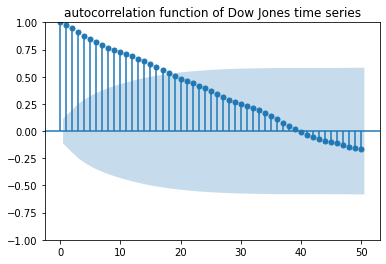

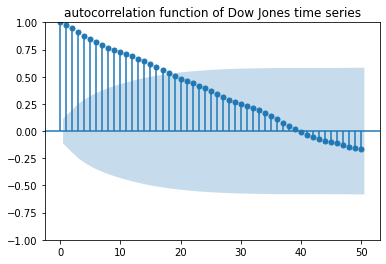

In [64]:
# ACF plot on 50 time lags
series = read_excel('DowJones.xls', sheet_name='Data2', header=0, index_col=0, parse_dates=True)
plot_acf(series, title='autocorrelation function of Dow Jones time series', lags=50)

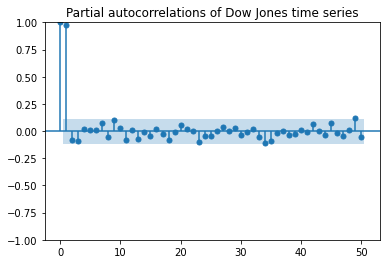

In [63]:
# PACF plot on 50 time lags
plot_pacf(series, title='Partial autocorrelations of Dow Jones time series', lags=50)
pyplot.show()

### Takeaway message
The PACF together with the ACF have many applications; in particular, concepts to determine whether a time series is white noise, stationary or seasonal. The definitions of white noise and stationarity together with related
illustrations are provided below. Also, the ACF and PACF can be useful in identifying ARIMA
models, in particular the pure AR and MA ones.

# A white noise model

When testing for suitability, a forecasting model is deemed to be sufficiently well suited to a
particular application if the forecast errors are purely random. The residuals are then described as
white noise. A simple example of a white noise model is given by:

$$ Y_t = c + e_t $$

where:
- c represents a constant overall level
- $e_t$ is a random error component

Theoretically, all autocorrelation coefficients for series of random numbers must be zero.
But as we have finite samples, each of the sample’s autocorrelation will not be exactly zero. It
has been shown that, if a time series is white noise, both autocorrelation coefficients and partial
autocorrelation coefficients are approximately independent and normally distributed with mean
zero and standard deviation $(\frac{1}{\sqrt{n}})$, where \(n\) is the number of observations in the series. Hence, it
is useful to plot the **ACF** and **PACF** with range $(\pm \frac{1.96}{\sqrt{n}})$, when analyzing what coefficients are
significant or to determine whether data are white noise. If any coefficients lie outside this range,
the data are probably not white noise.


In [59]:
#importing libraries
from random import gauss
from random import seed
from pandas import Series

Statistics of the artificially generated series:
count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


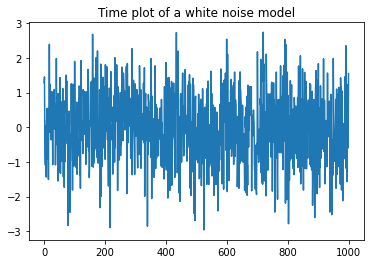

In [65]:
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]

# Once created, we can wrap the list in a Pandas Series for convenience.
series = Series(series)

# summary statistics of the artificially generated series
print('Statistics of the artificially generated series:')
print(series.describe())

# line plot of the artificially generated series
series.plot(title='Time plot of a white noise model')
pyplot.show()


In [ ]:
# create the histogram plot of the artificially generated series


<details>
<summary><b>Click here for the code</b></summary>

series.hist()

</details>

In [68]:
# plot the ACF plot of the artificially generated white noise time series
plot_acf(  input_series  , title='ACF of a white noise model', lags=50)

NameError: name 'input_series' is not defined

<details>
<summary><b>Click here for the code</b></summary>

plot_acf(series, title='ACF of a white noise model', lags=50)

</details>

In [69]:
# PACF plot of the artificially generated white noise time series
plot_pacf(input_series, title='PACF of a white noise model', lags=50)
pyplot.show()

NameError: name 'input_series' is not defined

# Removing non-stationarity: the method of differencing

It is important to remove trends, or **non-stationarity**, from time series data prior to model building, since such autocorrelations dominate the ACF. One way of removing non-stationarity is through the method of differencing. The differenced series is defined as the change between each observation in the original time series:

$$Y_t' = Y_t - Y_{t-1}$$

Occasionally, such taking of first differences is insufficient to remove non-stationarity. In that case, second-order differences usually produce the desired effect:

$$Y_t'' = Y_t' - Y_{t-1}'$$


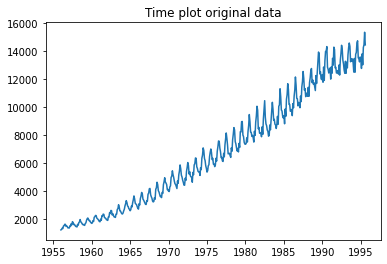

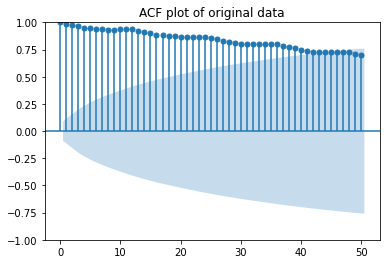

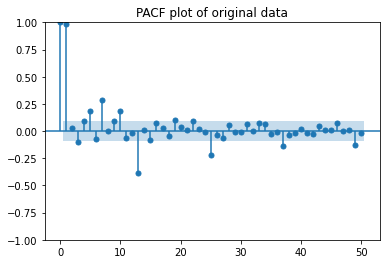

In [71]:
## removing seasonality from time series using seasonal differencing

series = read_excel('Electricity.xls', sheet_name='ELEC', header=0, index_col=0, parse_dates=True)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot original data')
plot_acf(series, title='ACF plot of original data', lags=50)
plot_pacf(series, title='PACF plot of original data', lags=50)
pyplot.show()



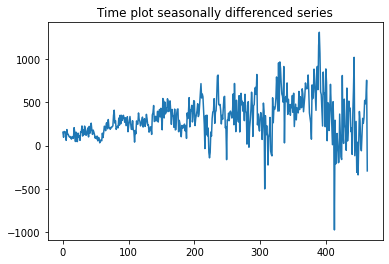

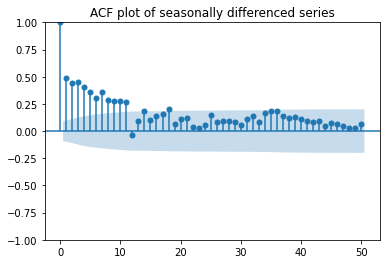

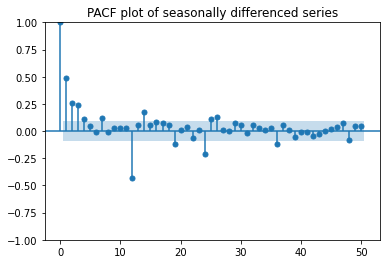

In [73]:
#  Seaonal difference
X = series.values
SeasDiff = list()
for i in range(12, len(X)):
	value = X[i] - X[i - 12]
	SeasDiff.append(value)

# Time, ACF, and PACF plots for the seasonally differenced series
pyplot.plot(SeasDiff)
pyplot.title('Time plot seasonally differenced series')
plot_acf(SeasDiff, title='ACF plot of seasonally differenced series', lags=50)
plot_pacf(SeasDiff, title='PACF plot of seasonally differenced series', lags=50)
pyplot.show()

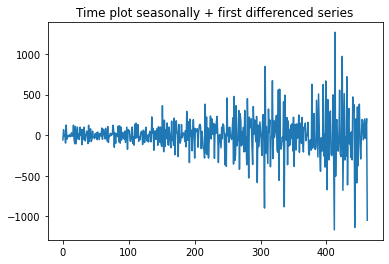

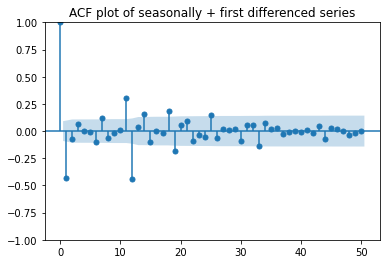

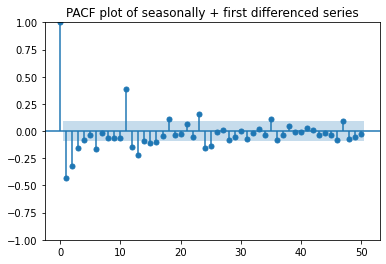

In [74]:
### Seasonal + First difference
Y = SeasDiff
SeasFirstDiff = list()
for i in range(1, len(Y)):
	value = Y[i] - Y[i - 1]
	SeasFirstDiff.append(value)
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')
plot_acf(SeasFirstDiff, title='ACF plot of seasonally + first differenced series', lags=50)
plot_pacf(SeasFirstDiff, title='PACF plot of seasonally + first differenced series', lags=50)
pyplot.show()

# Autoregression (AR) models

Models that use the AR equation as described in Section 5.1.1 are termed AR models. They are
classified by the number of time lags, \(p\), used in the autoregression. In general, a \(p\)th order AR
model, or AR(\(p\)) model, is written as:

$$ Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + e_t $$

where:
- c represents a constant overall level.
- $(\phi_j)$ are parameters to be determined.
- $(e_t)$ is the error term.

There are constraints on the allowable values of $(\phi_j)$:
- For $(p = 1)$, $(-1 < \phi_1 < 1)$.
- For $(p = 2$), $(-1 < \phi_2 < 1$), $(\phi_2 + \phi_1 < 1$), and $(\phi_2 - \phi_1 < 1$).
- For $(p \geq 3$), more complicated conditions hold.

An example of an AR(1) model is:

$$ Y_t = 3 + 0.7 Y_{t-1} + e_t $$

where $(e_t$) is normally distributed with mean 0 and variance 1.


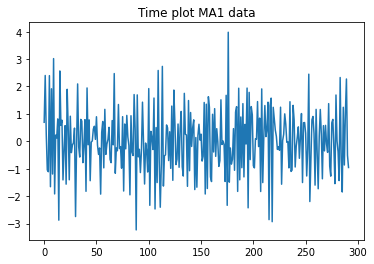

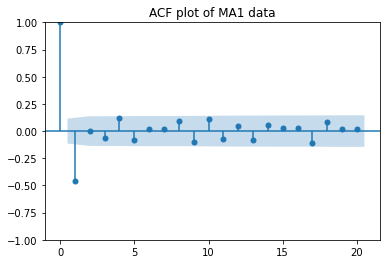

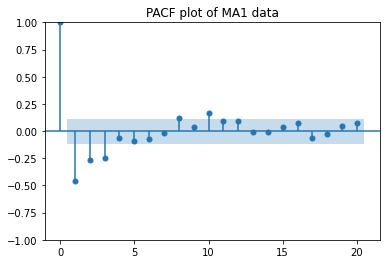

In [75]:
series = read_excel('DataMA1model.xls', sheet_name='MAdata', usecols = [1],
                    header=0)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot MA1 data')
plot_acf(series, title='ACF plot of MA1 data', lags=20)
plot_pacf(series, title='PACF plot of MA1 data', lags=20)
pyplot.show()

For an **AR(1)** model, typically the **ACF** shows autocorrelations dying down to zero, while there is only one peak in the **PACF** at lag 1. With real-life or empirical data, random effects will give a more varied picture, as shown by the higher variance example above.

The general expression of the **AR model** can be rewritten in backshift notation as:

$$(1 - \phi_1 B - ... - \phi_p B^p)Y_t = c + e_t$$


# Moving Average (MA) models

As well as regressing on the observations at previous time lags, as in AR models, we can also regress on the error terms at previous time lags. Such models are called Moving Average (MA) models (nothing to do with the moving average described in Chapter 2). Again, an MA model is classified by the number of time lags, q, used in the regression. A general MA(q) is written as:

$ Y_t = c + e_t - \theta_1 e_{t-1} - \ldots - \theta_q e_{t-q} $

where:
- c is a constant,
- $(\theta_j$) are parameters to be determined, and
- $(e_t$) are the error terms.

As with AR models, there are restrictions on the allowable values of \(\theta_j\):
- For $(q = 1$), $(-1 < \theta_1 < 1$).
- For $(q = 2$), $(-1 < \theta_2 < 1$), $(\theta_2 + \theta_1 < 1$), and $(\theta_2 - \theta_1 < 1$).
- For $(q \geq 3$), more complicated conditions hold.

An example of an MA(1) model is:

$ Y_t = 10 + e_t - 0.7e_{t-1} $

where $(e_t$) is normally distributed with mean 0 and variance 1.


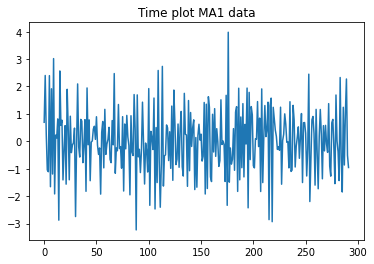

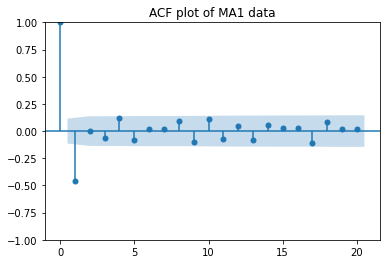

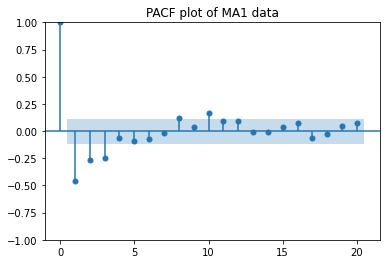

In [76]:
series = read_excel('DataMA1model.xls', sheet_name='MAdata', usecols = [1],
                    header=0)

# Time, ACF, and PACF plots for original data
pyplot.plot(series)
pyplot.title('Time plot MA1 data')
plot_acf(series, title='ACF plot of MA1 data', lags=20)
plot_pacf(series, title='PACF plot of MA1 data', lags=20)
pyplot.show()

For an **MA(1)** model, typically the **ACF** shows only one peak in the ACF at lag 1, while the **PACF** shows partial autocorrelations dying down to zero. With real-life or empirical data, random effects will give a slightly more varied picture, as with the higher variance example above. Thus it can be seen that the **MA(1)** model is a mirror image of the **AR(1)** model, as far as the ACF and PACF are concerned.

The general expression of the **MA model** in the can be written backshift notation as:

$$Y_t = c + (1 - \theta_1 B - ... - \theta_q B^q)e_t$$

In [77]:
# SARIMAX.py
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

#==================================================================
#Loading the data set
df = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0,
                index_col=0, parse_dates=True)
df.index.freq = 'MS'
#==================================================================

<ipython-input-77-fc0d82882ce0>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0,


In [78]:
#Fitting the ARIMA model and printing related statistics
# ARIMA(0, 1, 1)(0,1,1)12 in this case;
#this one is based on MA1 model template
mod = sm.tsa.statespace.SARIMAX(df, order=(1,1,1), seasonal_order=(0,1,1,12))
results = mod.fit(disp=False)
print(results.summary())
#==================================================================

                                     SARIMAX Results                                      
Dep. Variable:                         Production   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1030.968
Date:                            Mon, 06 May 2024   AIC                           2069.936
Time:                                    17:46:13   BIC                           2084.054
Sample:                                09-01-1986   HQIC                          2075.617
                                     - 09-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1172      0.134     -0.877      0.380      -0.379       0.145
ma.L1         -0.3691      0.120   

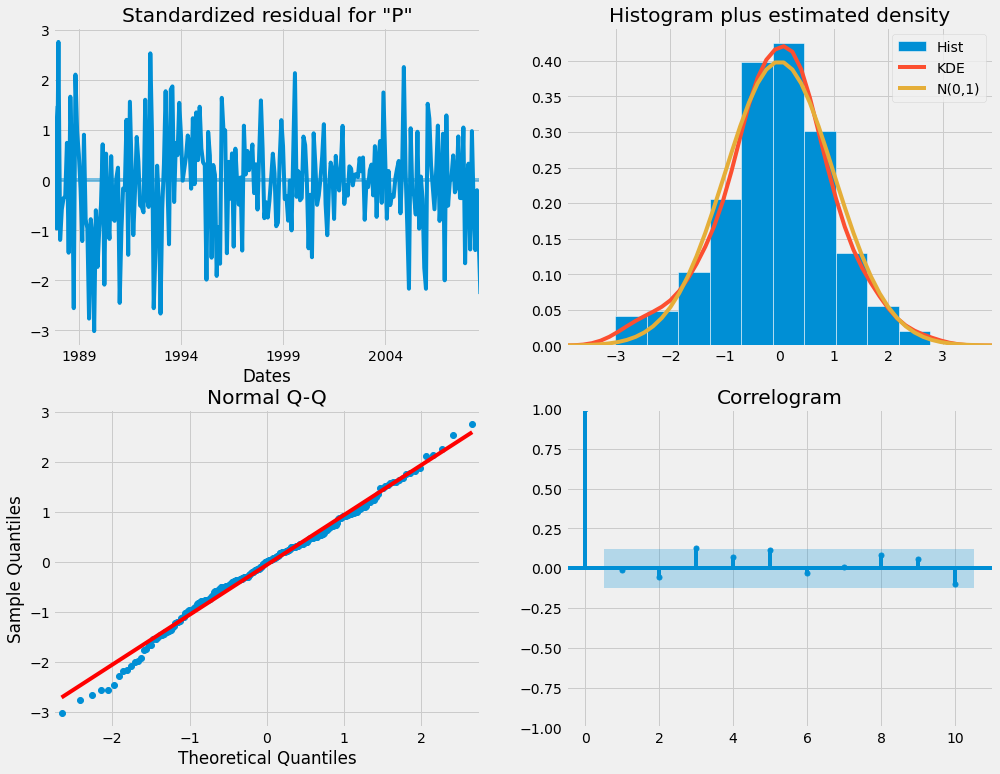

In [79]:
#GRAPH BLOCK1======================================================
#Printing the graphical statistics of model (correlogram = ACF plot)
results.plot_diagnostics(figsize=(15, 12))
plt.show()
#==================================================================

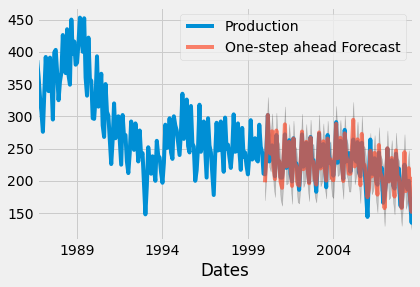

In [80]:
#GRAPH BLOCK2======================================================
# printing the part of forecasts fitted to original data (for accuracy evaluation)
# the start date has to be provided; hence should be a time within the original time series;
# in this case, it is to start on 01 January 2000
pred = results.get_prediction(start=pd.to_datetime('2000-01-01'), dynamic=False)
pred_ci = pred.conf_int()

# printing one-step ahead forecasts together with the original data set;
# hence, the starting point (year) of the data set is required
# in order to build the plot of original series
ax = df['1986':].plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()
#===================================================================

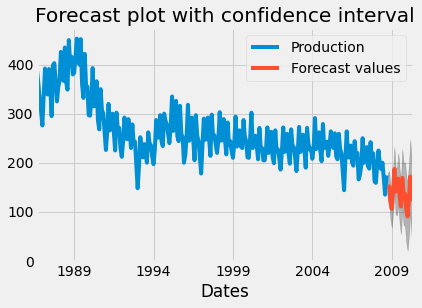

MSE of the forecasts is 2000-01-01 00:00:00   NaN
2000-02-01 00:00:00   NaN
2000-03-01 00:00:00   NaN
2000-04-01 00:00:00   NaN
2000-05-01 00:00:00   NaN
                       ..
2008-06-01 00:00:00   NaN
2008-07-01 00:00:00   NaN
2008-08-01 00:00:00   NaN
2008-09-01 00:00:00   NaN
Production            NaN
Length: 106, dtype: float64


In [81]:
#GRAPH BLOCK3=======================================================
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
# plotting forecasts ahead
ax = df.plot(label='Original data')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast values', title='Forecast plot with confidence interval')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()
#====================================================================

#====================================================================
# MSE evaluation
y_forecasted = pred.predicted_mean
y_truth = df['2000-01-01':]
# Compute the mean square error
MSE = ((y_forecasted - y_truth) ** 2).mean()
print('MSE of the forecasts is {}'.format(round(MSE, 2)))
#====================================================================

In [32]:
# AutomaticOrderSARIMAX.py
#===================================================
#Code for identifying the parameters with smallest AIC
#===================================================
from pandas import read_excel
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
plt.style.use('fivethirtyeight')

series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)

#Define the p, d and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets (i.e., P, D, Q)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Indentification of best model from different combinations of pdq and seasonal_pdq
warnings.filterwarnings("ignore") # specify to ignore warning messages
best_score, best_param, best_paramSeasonal = float("inf"), None, None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series, order=param, seasonal_order=param_seasonal, enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_score:
                best_score, best_param, best_paramSeasonal = results.aic, param, param_seasonal
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('The best model is ARIMA{}x{} - AIC:{}'.format(best_param, best_paramSeasonal, best_score))

<ipython-input-32-2e285c0579ff>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  series = read_excel('BuildingMaterials.xls', sheet_name='Data', header=0, index_col=0, parse_dates=True)


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:3718.8589858085606
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:3407.9873144305507
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2463.755234631169
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:2456.249081845318
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:2633.9315172413226
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:2625.5089241437695
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:2460.0881815689872
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:2448.1526057046176
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:3420.3934063821007
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:3136.488968672705
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:2328.702839352679
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:2330.6840807059616
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:2487.368288201985
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2489.364173739218
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:2330.6909787751633
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2326.8223085390305
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2714.7674515796884
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:2529.9678612143043
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC